In [ ]:
# define architecture
# take batch and do
#   * read image
#   * preprocess
#   * (optional) rotate, etc
#   * feed into NN
# train and show cost per epoch 
# test to show accuracy

In [1]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

True

In [4]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

In [5]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


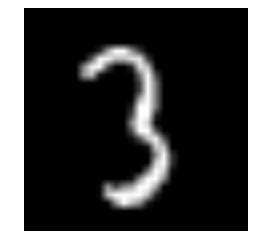

In [7]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [8]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0 
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [9]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [10]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential([
    Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
        
    Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 50)            39250       dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            510         dense_1[0][0]                    
Total params: 39760
____________________________________________________________________________________________________


In [14]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 2s - loss: 0.5869 - acc: 0.8442 - val_loss: 0.3317 - val_acc: 0.9090
Epoch 2/5
34300/34300 [==============================] - 1s - loss: 0.2671 - acc: 0.9244 - val_loss: 0.2548 - val_acc: 0.9293
Epoch 3/5
34300/34300 [==============================] - 1s - loss: 0.2135 - acc: 0.9396 - val_loss: 0.2182 - val_acc: 0.9398
Epoch 4/5
34300/34300 [==============================] - 1s - loss: 0.1820 - acc: 0.9485 - val_loss: 0.2020 - val_acc: 0.9418
Epoch 5/5
34300/34300 [==============================] - 1s - loss: 0.1605 - acc: 0.9548 - val_loss: 0.1848 - val_acc: 0.9468


In [15]:
pred = model.predict_classes(test_x)

20864/21000 [============================>.] - ETA: 0s

Prediction is:  5


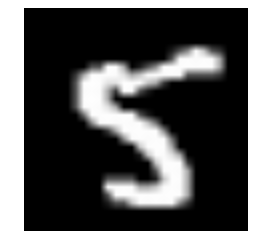

In [22]:
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print "Prediction is: ", pred[test_index]

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [31]:
sample_submission.filename = test.filename; sample_submission.label = pred

In [32]:
sample_submission.to_csv(os.path.join(sub_dir, 'sub02.csv'), index=False)

49000